In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [5]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv("allcams907.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
4801004,2020-09-07 15:00:06,/home/ubuntu/cams24/collegeTwp/20200907/202009...,3,2020-09-07 11:00:06,collegeTwp
4801005,2020-09-07 15:00:11,/home/ubuntu/cams24/CAM02037CCTV43/20200907/20...,4,2020-09-07 11:00:11,CAM02037CCTV43
4801006,2020-09-07 15:00:13,/home/ubuntu/cams24/CAM02038CCTV44/20200907/20...,1,2020-09-07 11:00:13,CAM02038CCTV44
4801007,2020-09-07 15:00:15,/home/ubuntu/cams24/CAM02039CCTV45/20200907/20...,5,2020-09-07 11:00:15,CAM02039CCTV45


In [6]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [9]:
#icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='W'),xdf.camera_name]).size().reset_index(name='image_count')
#icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
#icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='W'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
#icdfcvc['image_count'] = icdf["image_count"]

In [7]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [8]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

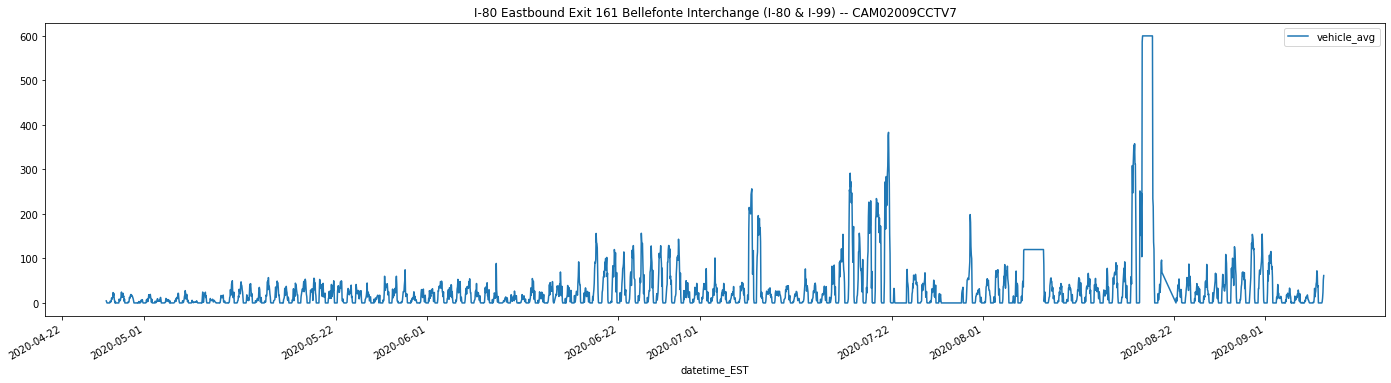

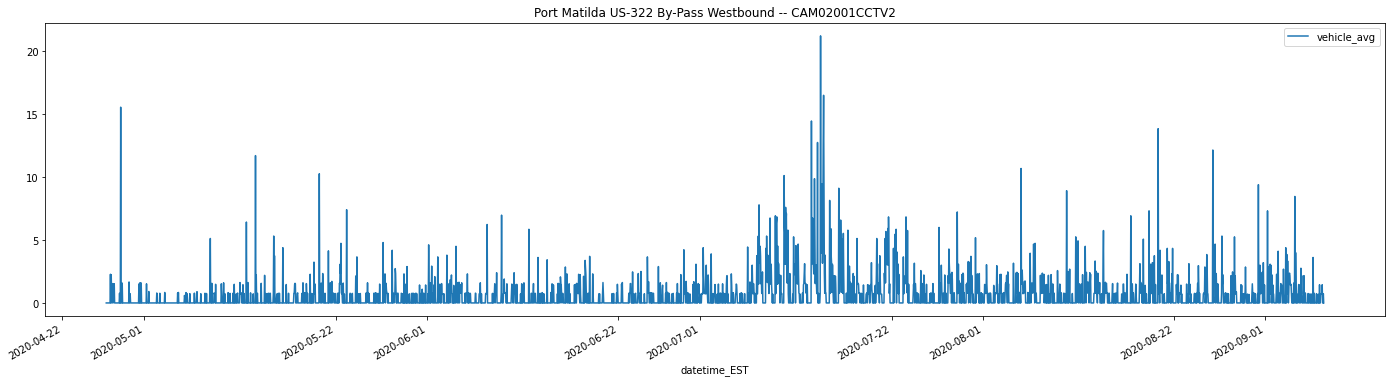

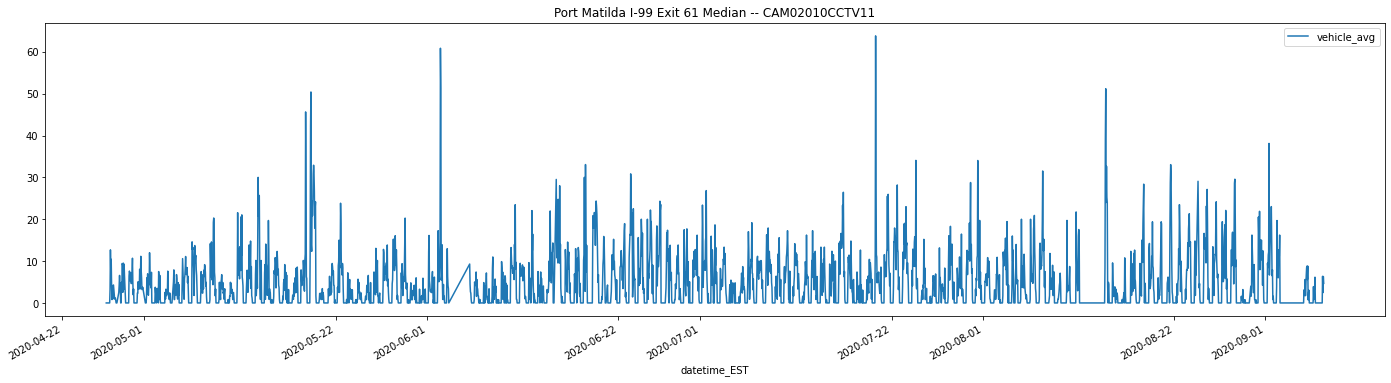

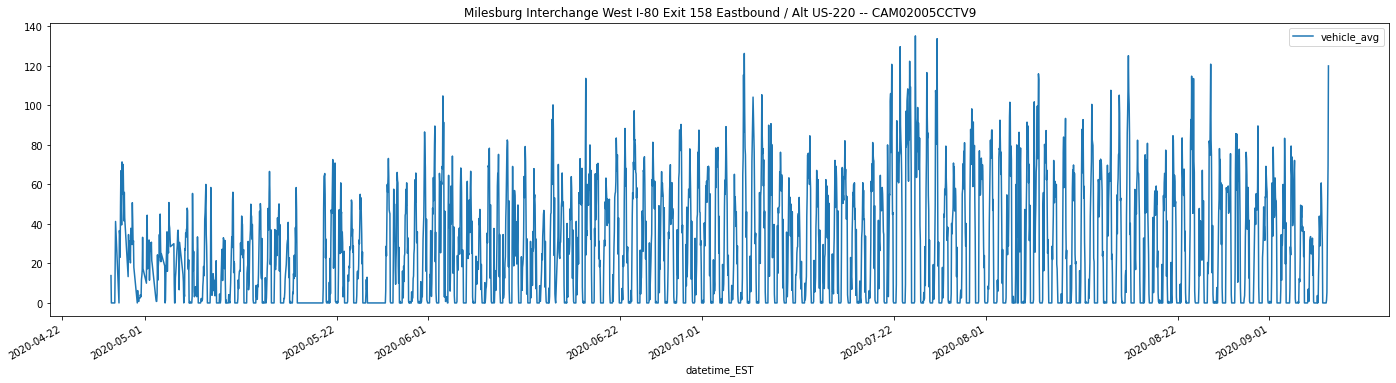

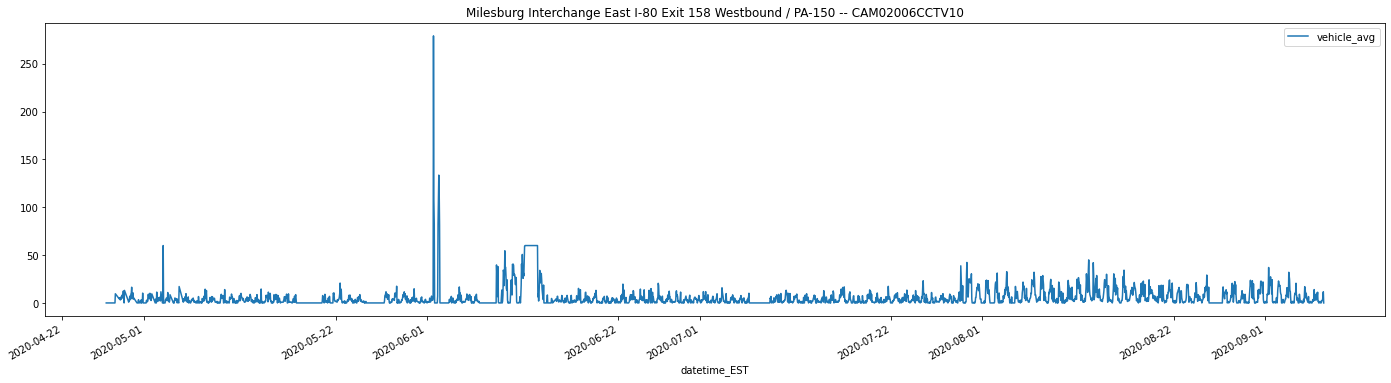

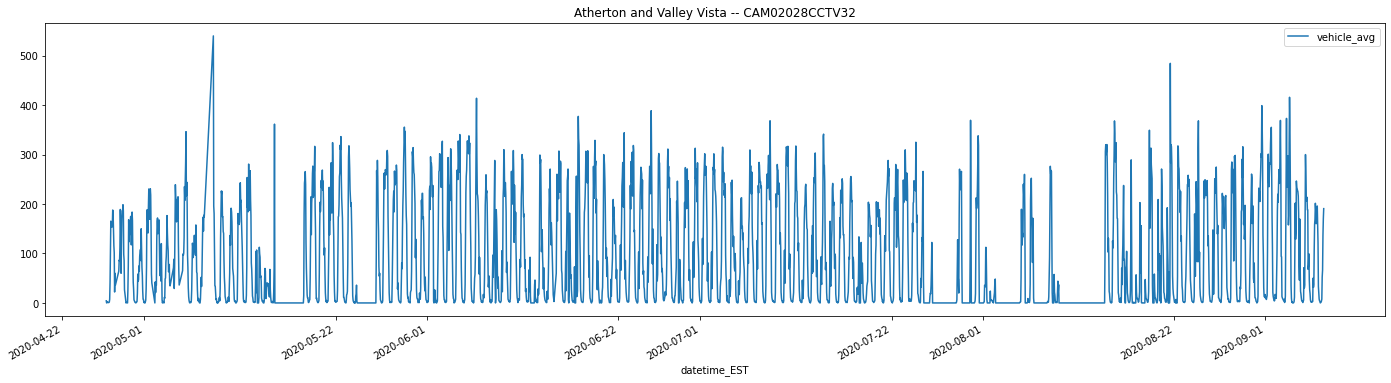

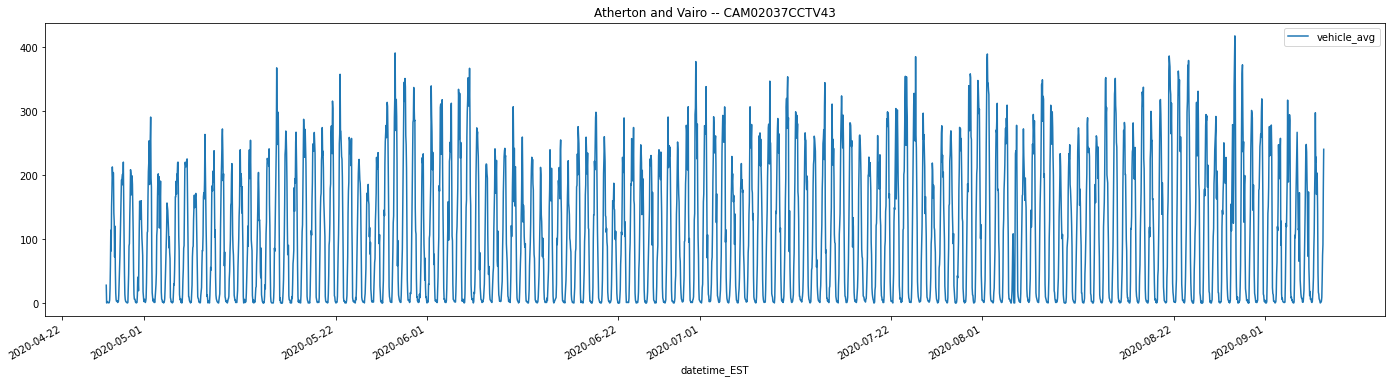

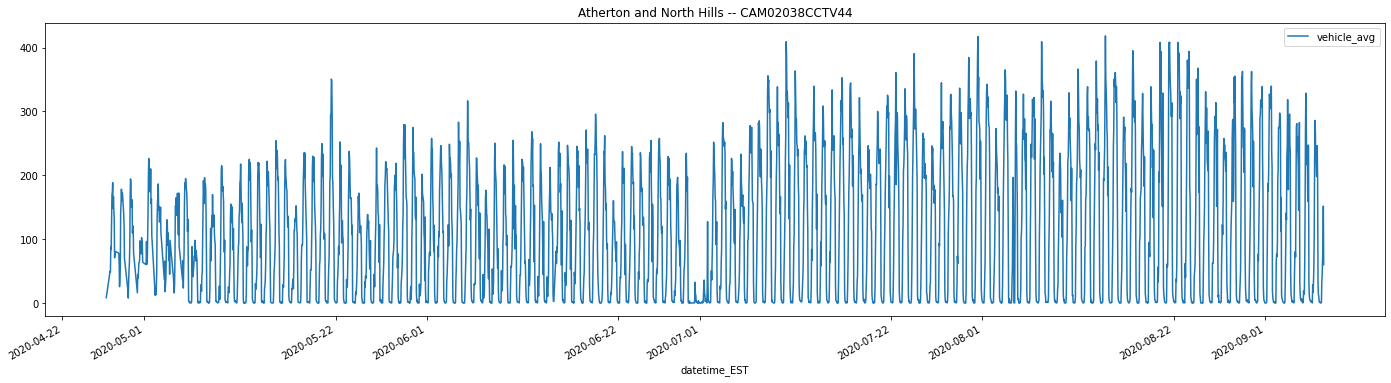

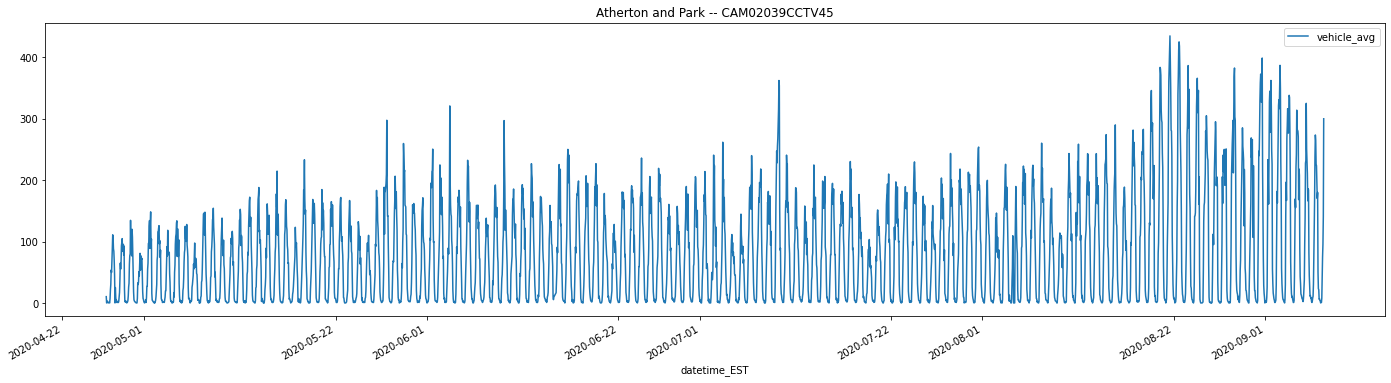

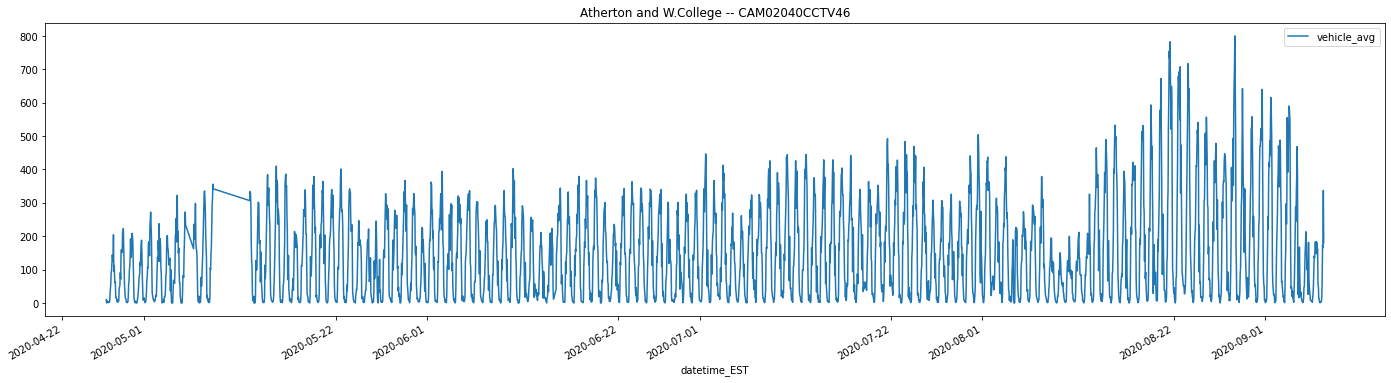

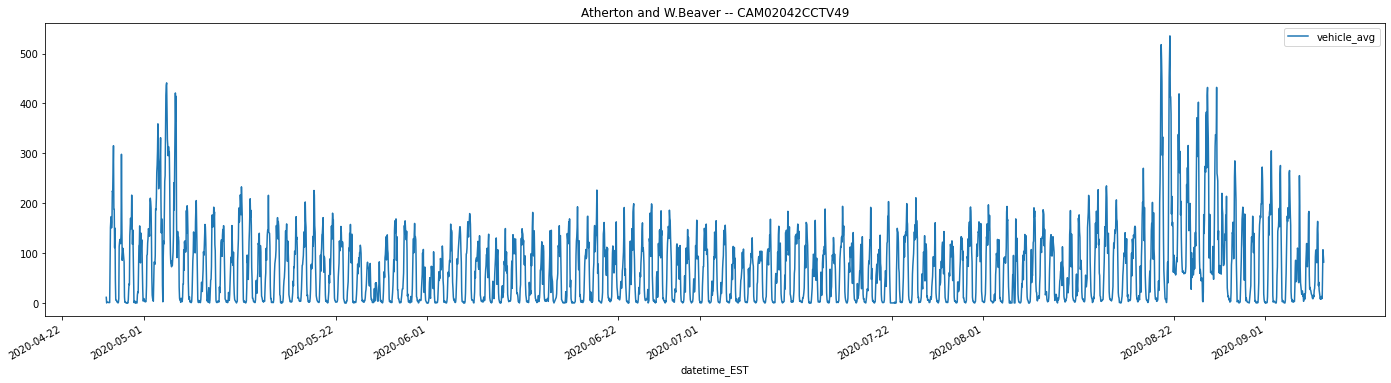

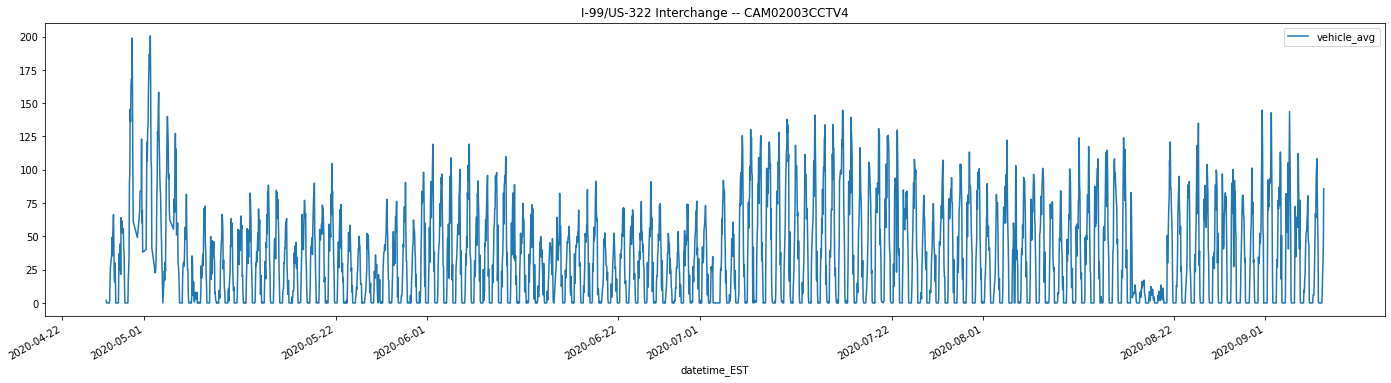

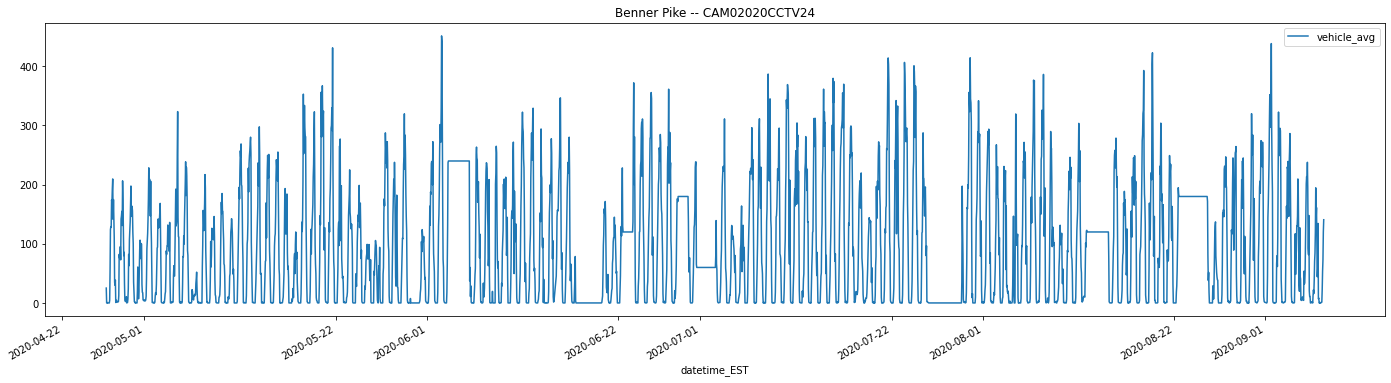

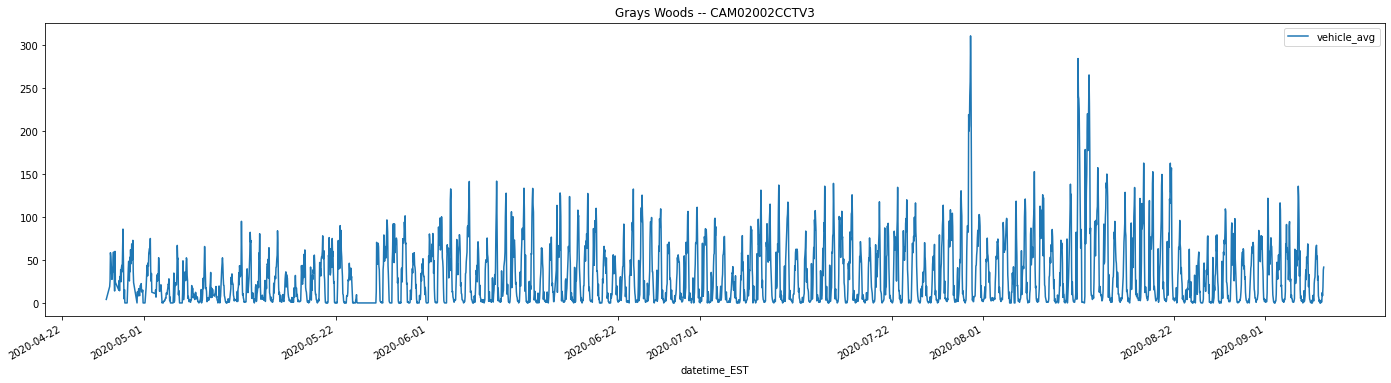

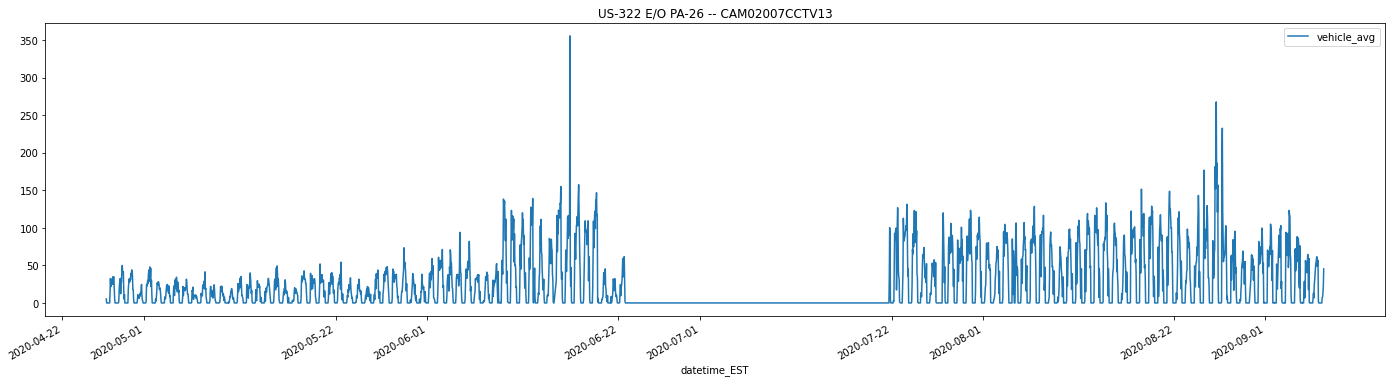

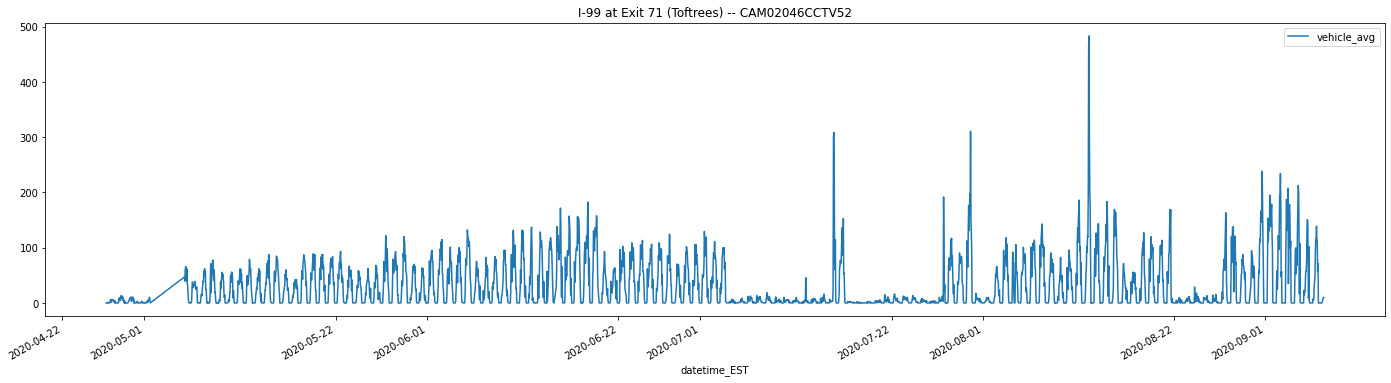

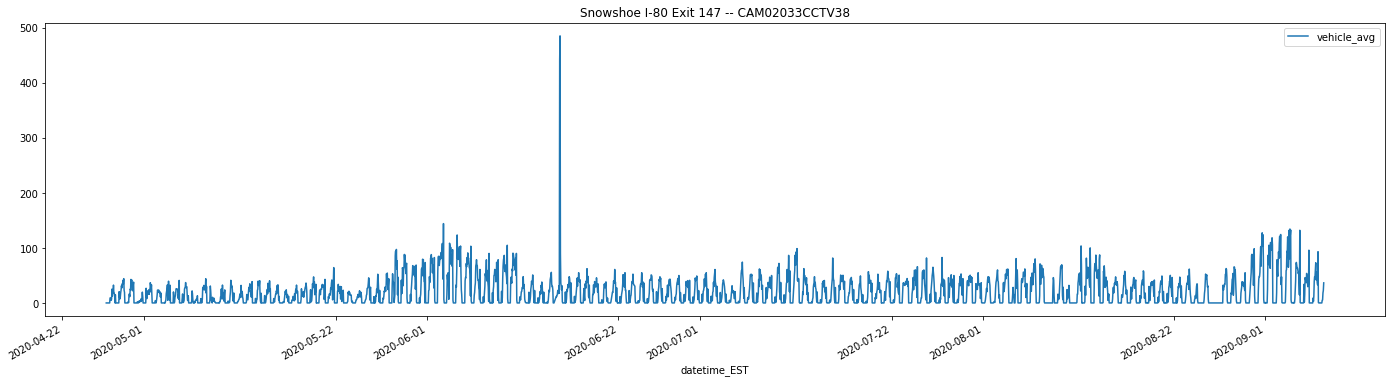

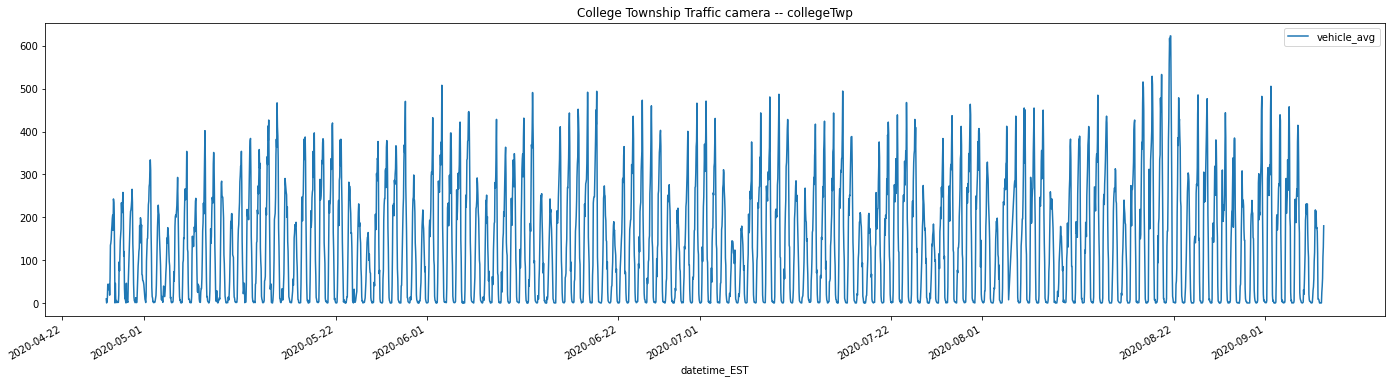

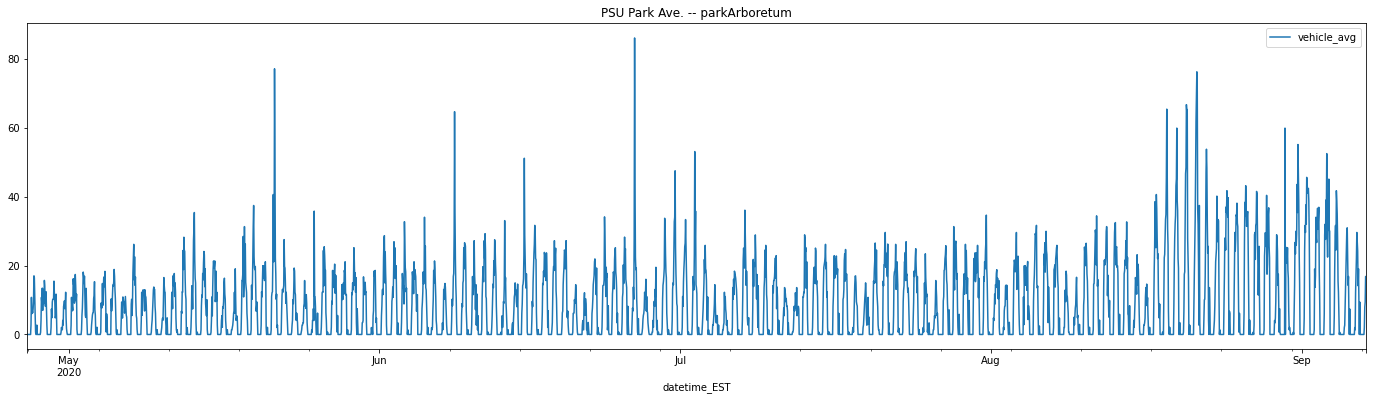

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [10]:
xdf

,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
4801004,2020-09-07 15:00:06,/home/ubuntu/cams24/collegeTwp/20200907/202009...,3,2020-09-07 11:00:06,collegeTwp
4801005,2020-09-07 15:00:11,/home/ubuntu/cams24/CAM02037CCTV43/20200907/20...,4,2020-09-07 11:00:11,CAM02037CCTV43
4801006,2020-09-07 15:00:13,/home/ubuntu/cams24/CAM02038CCTV44/20200907/20...,1,2020-09-07 11:00:13,CAM02038CCTV44
4801007,2020-09-07 15:00:15,/home/ubuntu/cams24/CAM02039CCTV45/20200907/20...,5,2020-09-07 11:00:15,CAM02039CCTV45


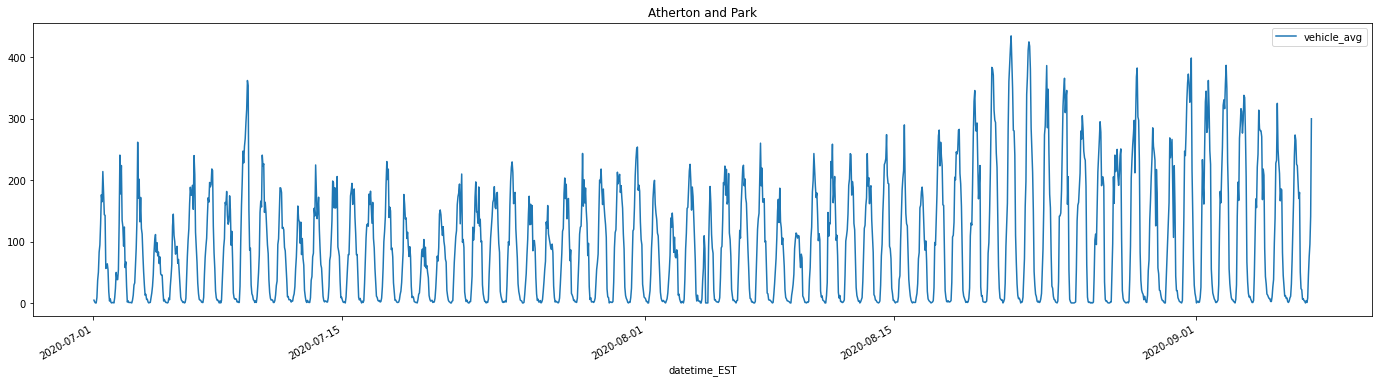

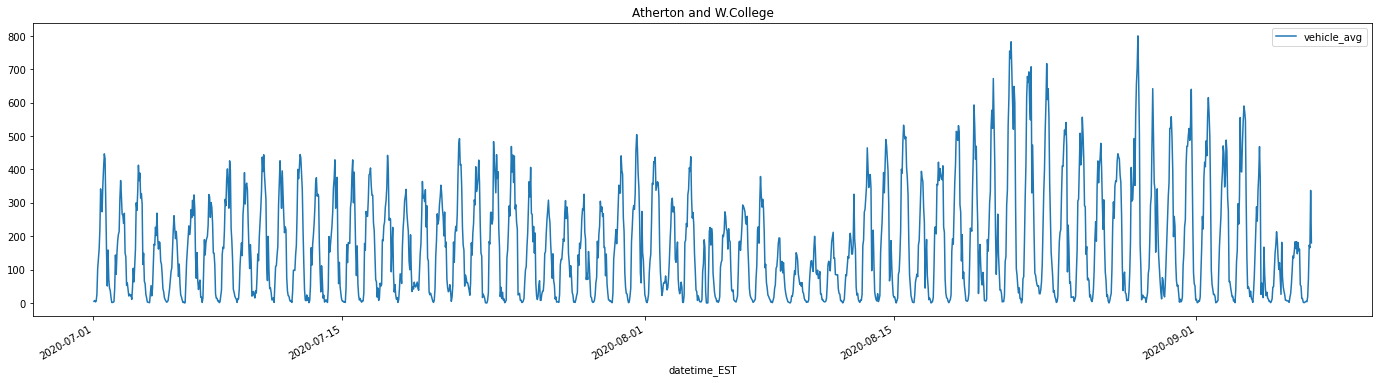

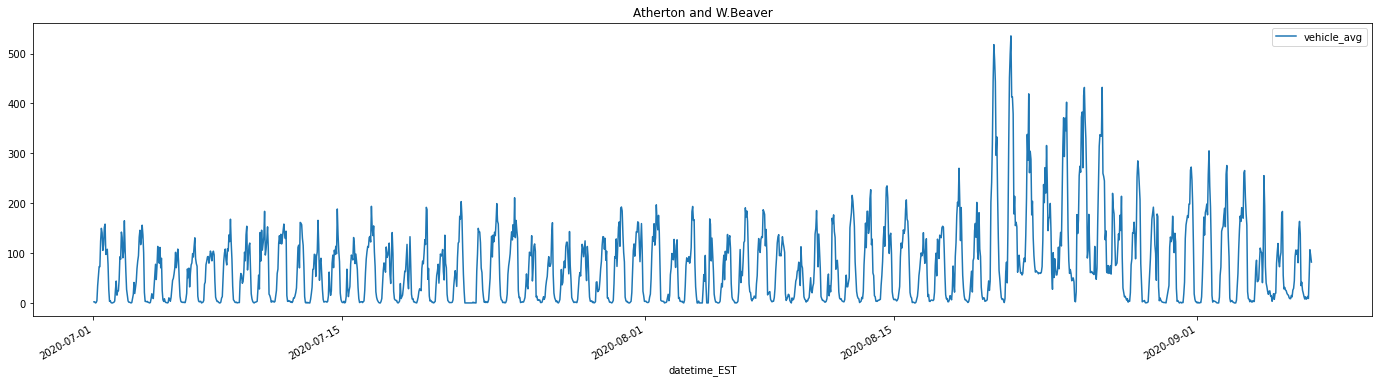

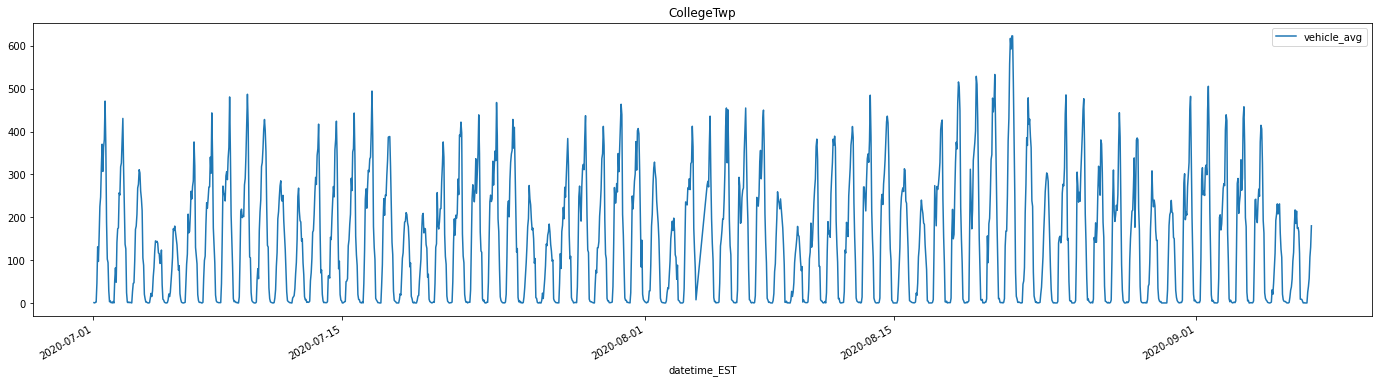

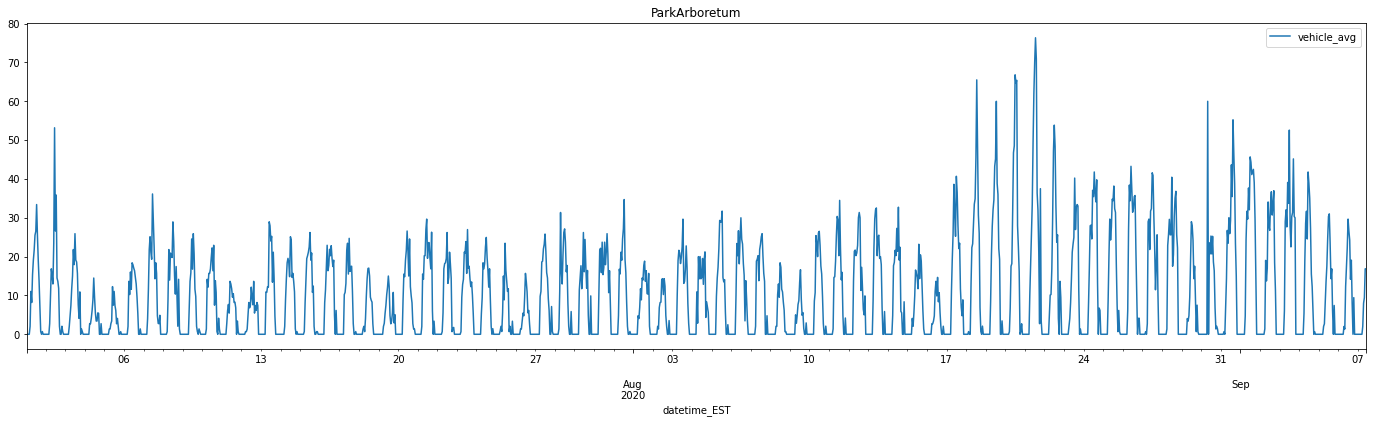

In [11]:
lbs = ["Atherton and Park","Atherton and W.College","Atherton and W.Beaver","CollegeTwp","ParkArboretum"]
lc = 0
for c in ["CCTV45","CCTV46","CCTV49","collegeTwp","park"]:
    cn = c
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    fdf_twp = fdf_twp[(fdf_twp['datetime_EST'] > '2020-7-1 00:00:00') ] 
    ax = fdf_twp.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{lbs[lc]}")
    lc += 1

In [12]:
icdfcvc.to_csv("vehicle_avg_per_hour_each_camera_427-907.csv",index=False)

In [13]:
xdf

,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
4801004,2020-09-07 15:00:06,/home/ubuntu/cams24/collegeTwp/20200907/202009...,3,2020-09-07 11:00:06,collegeTwp
4801005,2020-09-07 15:00:11,/home/ubuntu/cams24/CAM02037CCTV43/20200907/20...,4,2020-09-07 11:00:11,CAM02037CCTV43
4801006,2020-09-07 15:00:13,/home/ubuntu/cams24/CAM02038CCTV44/20200907/20...,1,2020-09-07 11:00:13,CAM02038CCTV44
4801007,2020-09-07 15:00:15,/home/ubuntu/cams24/CAM02039CCTV45/20200907/20...,5,2020-09-07 11:00:15,CAM02039CCTV45


In [14]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn2.drop(xdfn2[(xdfn2["camera_name"] == "CAM02009CCTV7") & (xdfn2['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn2['datetime_EST'] < '2020-8-19 16:03:00') ].index)

# drop images from west beaver:

In [11]:

#tt = xdf[(xdf["camera_name"] == "CAM02007CCTV13") & (xdf['datetime_EST'] > '2020-6-22 14:06:00') & (xdf['datetime_EST'] <= '2020-6-23 00:00:00') ]



In [12]:
#ax = tt.plot(x ='datetime_EST', y='vehicle_count', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [15]:
icdf = xdfn3.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn3.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn3.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn3.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [16]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn3.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn3.set_index('datetime_EST').resample('H').sum().reset_index()

In [17]:
df_sampledh

,datetime_EST,vehicle_count
0,2020-04-26 20:00:00,144
1,2020-04-26 21:00:00,0
2,2020-04-26 22:00:00,11
3,2020-04-26 23:00:00,38
4,2020-04-27 00:00:00,77
...,...,...
3203,2020-09-07 07:00:00,688
3204,2020-09-07 08:00:00,1280
3205,2020-09-07 09:00:00,1708
3206,2020-09-07 10:00:00,2421


In [18]:
icdfs

,datetime_EST,image_sum
0,2020-04-26 20:00:00,960
1,2020-04-26 21:00:00,68
2,2020-04-26 22:00:00,516
3,2020-04-26 23:00:00,794
4,2020-04-27 00:00:00,796
...,...,...
3203,2020-09-07 07:00:00,1551
3204,2020-09-07 08:00:00,1558
3205,2020-09-07 09:00:00,1550
3206,2020-09-07 10:00:00,1561


In [19]:
df_sampledh["image_count"] = icdfs['image_sum']

In [20]:
df_sampledh

,datetime_EST,vehicle_count,image_count
0,2020-04-26 20:00:00,144,960
1,2020-04-26 21:00:00,0,68
2,2020-04-26 22:00:00,11,516
3,2020-04-26 23:00:00,38,794
4,2020-04-27 00:00:00,77,796
...,...,...,...
3203,2020-09-07 07:00:00,688,1551
3204,2020-09-07 08:00:00,1280,1558
3205,2020-09-07 09:00:00,1708,1550
3206,2020-09-07 10:00:00,2421,1561


In [21]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count) / (float(row.image_count)/(19.0 * 60.0)))
    return rv   



In [22]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [23]:
df_sampledh.to_csv("vehicle_avg_per_hour_all_cameras_427-907.csv",index=False)

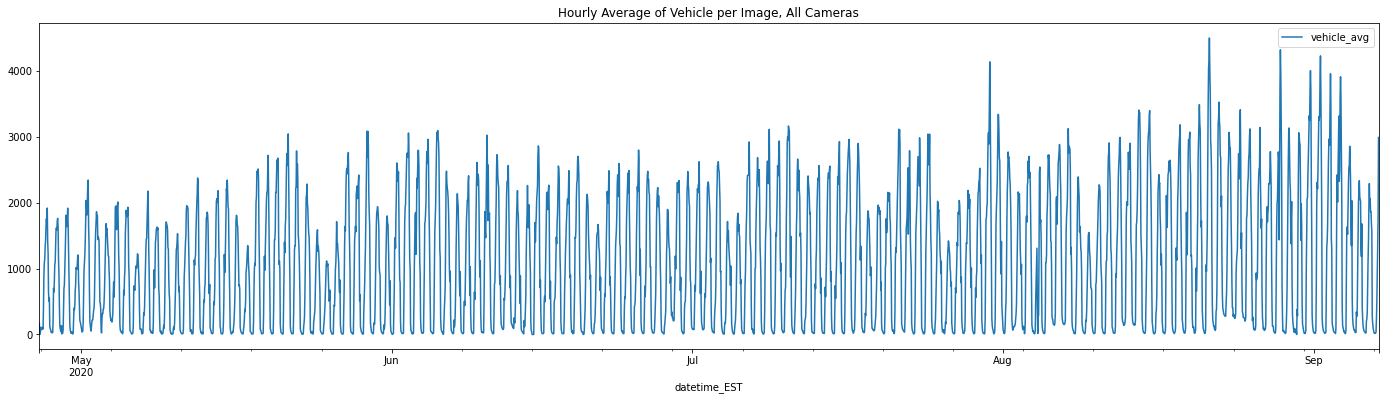

In [24]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

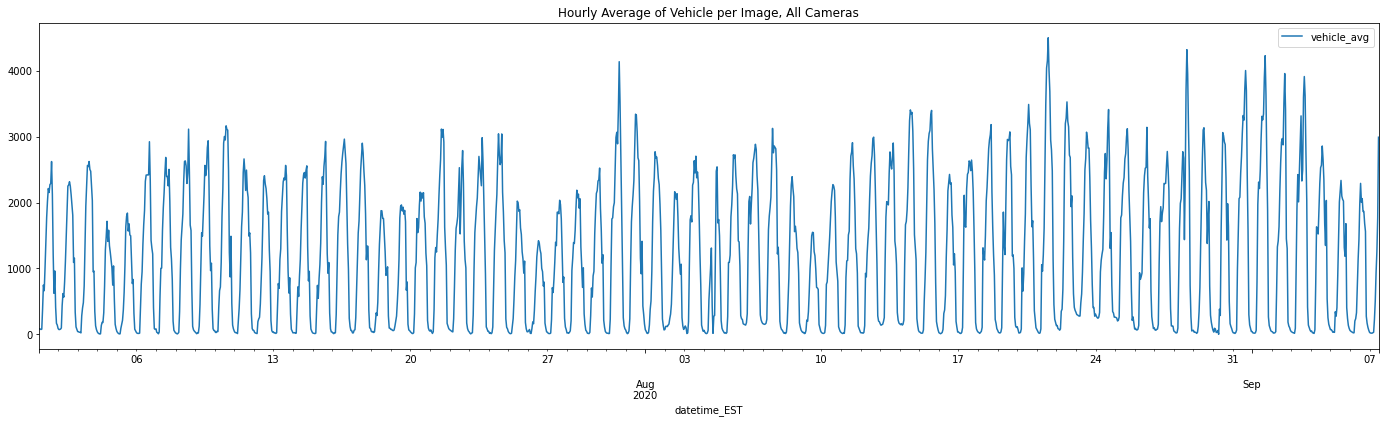

In [25]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-7-1 00:00:00') ] 
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")